# Clonalg

In this notebook, we will test and find appropriate parameters for Clonal Selection Algorithm.

### Table of Contents

* [Test 1](#test_1): number of initial population
* [Test 2](#test_2): number of generations (iterations)
* [Test 3](#test_3): c parameter
* [Test 4](#test_4): beta (number of copies)
* [Test 5](#test_5): p_max
* [Test 6](#test_6): fi (scaling parameter)
* [Test 7](#test_7): k (adjustment rate)
* [Summary](#sum)

#### Clonalg have following parameters:
1. N - number of initial population, initial value is 10,
2. b_low, b_up - lower and upper bounds of search area, initials values are -10 and 10,
3. generations - number of iterations, initial value is 20, (it's worth mentioning that in gsa the population can be constant or decreasing),
4. c - percentage of individuals will be left every iteration, initial value is 0.7,
5. beta - maximum number of copies beta*N, initial value is 2,
6. p_max - maximum reach of mutation, initial value is 3,
7. fi - scaling parameter, initial value is 0.2,
8. k - adjustment rate equals to 0.95,
9. if_min - if we are looking for minimum then if_min should be True, if maximum then if_min should be False, initially it is True.

Also, there is a possibility to return all the best value from each iteration:
8. return_all_best, assigned to False.

#### This will be tested by the following functions:
1. Matyas: 
    1. expected minimum f(0,0) = 0,
    2. search domain -10 < x,y < 10
2. Rastrigin:
    1. expected minimum f(0,0) = 0,
    2. search domain -5.12 < x,y < 5.12,
3. Booth:
    1. expected minimum f(1,3) = 0,
    2. search domain -10 < x,y < 10
4. Rosenbrock:
    1. expected minimum f(1,1) = 0,
    2. search domain R,
5. Levy function N.13:
    1. expected minimum f(1, 1) = 0,
    2. search domain -10 < x,y < 10,
6. Alpine N.1:
    1. expected minimum f(0,0) = 0,
    2. search domain -5.12 < x,y < 5.12,
7. Schwefel 2.20:
    1. expected minimum f(0, 0) = 0,
    2. search domain -10 < x,y < 10, 
6. Drop Wave
    1. expected minimum f(0,0) = -1,
    2. search domain -5.12 < x,y < 5.12,

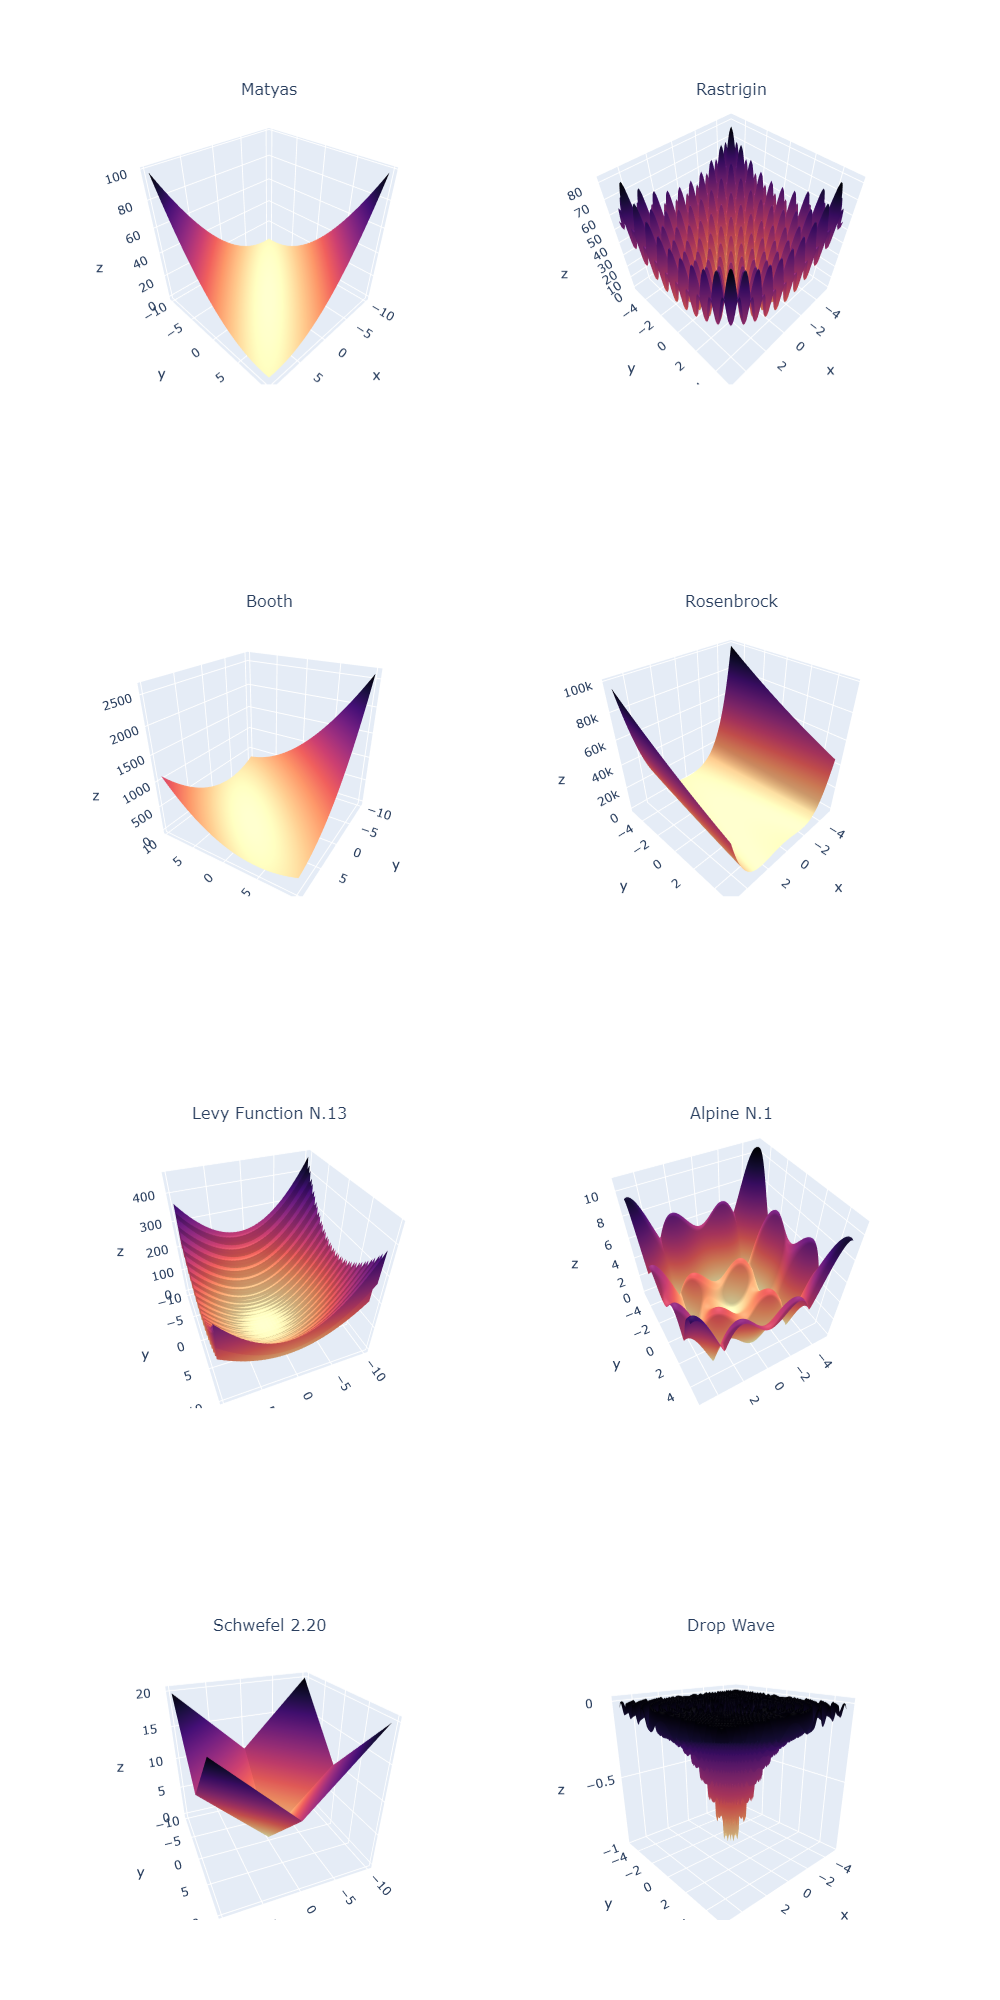

In [1]:
from IPython.display import Image
Image(filename="images/allplots.png")

To plot graphics like above I used plotly (the functions are defined below):

Import the class with gsa and important packages

In [1]:
from clonalg import Clonalg

import pandas as pd
import numpy as np
import time
import copy
import plotly.graph_objects as go

Define the test functions and the bounds:

In [2]:
def Matyas(var):
    x, y = var
    return 0.26*(x**2 + y**2) - 0.48*(x*y)

def Rastrigin(var):
    x, y = var
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def Rosenbrock(var):
    x, y = var
    return 100*((y - x**2)**2) + (1-x)**2

def Booth(var):
    x, y = var
    return (x + 2*y - 7)**2 + (2*x + y -5)**2

def Levy13(var):
    x, y = var
    return np.sin(2*np.pi*x)**2 + ((x-1)**2)*(1+np.sin(3*np.pi*y)**2) + ((y-1)**2)*(1+np.sin(2*np.pi*y)**2)

def Alpine1(var):
    x, y = var
    return np.abs(x*np.sin(x)+0.1*x) + np.abs(y*np.sin(y)+0.1*y)

def Schwefel220(var):
    x, y = var
    return np.abs(x)+np.abs(y)

def DropWave(var):
    x, y = var
    return (-1 - np.cos(12*np.sqrt(x**2+y**2)))/(0.5*(x**2+y**2) + 2)

bounds = [[-10,10], [-5.12,5.12]]
functions = [Alpine1, Booth, DropWave, Levy13, Matyas, Rastrigin, Rosenbrock,  Schwefel220]

### Test 1 <a class="anchor" id="test_1"></a>

In the first test we will see which number of initial population is the best. We will check N from 10 to 100 every 10. For each number of populations twenty values will be generated. From this we will get the average.

In [3]:
def test1(alg, low, up, f, n, nMean):
    start = time.time()
    opt = np.array([alg(N=n, b_low=low, b_up=up).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, n, f([x_mean,y_mean]), x_mean, y_mean, (end-start)/nMean]

In [4]:
values = []
for n in range(10, 110, 10):
    for f in functions:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test1(Clonalg, b_low, b_up, f, n, 20))
    
clonalgTest1 = pd.DataFrame(values, columns=['Algorithm','Function', 'Population','Value', 'x', 'y', 'time'])

In [6]:
with pd.ExcelWriter('clonalg.xlsx') as writer:  
    clonalgTest1.to_excel(writer, sheet_name='test1')

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(clonalgTest1.loc[:, clonalgTest1.columns != 'Algorithm'].groupby(['Function','Population']).min())

Value         x         y       time
Function    Population                                          
Alpine1     10           0.003489 -0.112058 -0.031659   0.043571
            20           0.084342  0.052937 -0.334283   0.167888
            30           0.069768 -0.221709  0.164023   0.324119
            40           0.031181 -0.046155 -0.227885   0.568339
            50           0.028745 -0.048163  0.119652   0.886998
            60           0.004080 -0.026847 -0.030395   1.296348
            70           0.026664 -0.023806 -0.216479   2.125515
            80           0.013115 -0.088813  0.070892   2.261471
            90           0.021980 -0.202173 -0.020029   2.440739
            100          0.020708  0.098560 -0.013306  10.244921
Booth       10           0.035422  1.139743  2.880835   0.039174
            20           0.000517  0.995117  3.013644   0.146702
            30           0.000680  1.011979  2.999599   0.269985
            40           0.000641  1.000907  2.987963   0.492489
            50           0.002541  0.985367  3.032472   0.739030
            60           0.001605  1.028785  2.972199   1.090234
            70           0.005934  1.015634  2.954345   1.766559
            80           0.000766  0.984371  3.004423   1.869675
            90           0.010124  0.935230  3.074499   5.365762
            100          0.000463  0.984154  3.011176   3.164351
DropWave    10          -0.920267 -0.075128 -0.492771   0.041970
            20          -0.352324 -0.108847  0.111071   0.165581
            30          -0.158416 -0.164944 -0.100669   0.326456
            40          -0.307755  0.330510  0.146737   0.564506
            50          -0.430112 -0.140016 -0.024940   0.866023
            60          -0.285957 -0.022976  0.165811   1.261702
            70          -0.305160 -0.026014  0.161808   2.083777
            80          -0.268634 -0.147096 -0.086457   2.208312
            90          -0.239865 -0.144736  0.100373   7.475514
            100         -0.523011 -0.017371  0.125517   3.040304
Levy13      10           0.036941  1.014187  0.864719   0.048370
            20           0.906339  1.189122  1.049429   0.191278
            30           0.174098  1.062025  0.876648   0.407380
            40           0.223133  0.923759  0.944610   0.703476
            50           0.019308  1.015936  0.915651   1.122735
            60           0.130118  1.052144  0.878993   1.600881
            70           0.034839  1.029462  0.990729   2.177559
            80           0.041590  1.032262  1.004099   2.761645
            90           0.005308  1.010709  1.025494   7.694529
            100          0.120346  1.055246  1.034588   3.817793
Matyas      10           0.002185 -0.228729 -0.185326   0.034776
            20           0.001141  0.146186  0.099919   0.121390
            30           0.000495 -0.088532 -0.109003   0.261402
            40           0.000257  0.081598  0.076992   0.430604
            50           0.000145  0.024442  0.044259   0.678121
            60           0.000336 -0.070495 -0.041474   1.003558
            70           0.000108 -0.052970 -0.047492   1.340457
            80           0.000100 -0.017661  0.002105   1.721938
            90           0.000015  0.016694  0.019627   4.812087
            100          0.000256  0.081500  0.073264   2.378005
Rastrigin   10          32.668569  0.352367 -0.360878   0.052365
            20          22.885430  0.889124 -0.552567   0.148851
            30          13.016364  0.149784 -0.231324   0.312733
            40          22.323801  0.260861 -0.273945   0.548813
            50          19.164599 -0.406938  0.058012   0.883364
            60          24.203847 -0.173702 -0.415198   1.278008
            70          13.419936  0.229151  0.160119   1.637345
            80          25.383711 -0.273115  0.311434   2.133527
            90           4.933943  0.122713 -0.104517   5.902672
            100          9.347099  0.141668  0.177290   2.95670

We expect to get 0 as the minimum for the all functions expect the Drop Wave function where we expect to receive -1.

##### 1. Alpine N.1     
The population size from now on will be 10.

#####  2. Booth
We received values close to 0.0005 for populations of size 20 and 100. As for the population of 20 we need 0.15 s and for 100 we need 3.16 s, then in further tests for the Booth function we will use the population of 20.

#####  3. Drop Wave function
The best value was achieved by the model with a population size of 10.

##### 4. Levy N.13
The population size from now on will be 90.

#####  5. Matyas function
The best value was achieved by the model with a population size of 50.

#####  6. Rastrigin
No model returned satisfactory results, but the closest model was one with a population equal to 90.

#####  7. Rosenbrock 
The best value was achieved by the model with a population size of 80.

#####  8. Schwefel 2.20 
The best value was achieved by the model with a population size of 80.

Now, we can make dictionary where will be saved the best parameters for each function.

In [7]:
clonalgParam = {'Alpine1':{'N':10}, 
           'Booth':{'N':20},
           'DropWave':{'N':10},
           'Levy13':{'N':90},
           'Matyas':{'N':50},
           'Rastrigin':{'N':90},
           'Rosenbrock':{'N':80},
           'Schwefel220':{'N':80}
           }

### Test 2 <a class="anchor" id="test_2"></a>

In Test 2, we will examine how the number of iterations (generations) affects finding the minimum. As it was mentioned, there is a parameter that return best point from each iteration. So we'll run test2 with a number of iterations of 100. As before, this will be 30 times and from here we'll get the mean values.

In [8]:
def test2(alg, f, low, up, num_it, nMean, param):
    x = [[] for i in range(num_it)]
    y = [[] for i in range(num_it)]
    f_val = [[] for i in range(num_it)]
    for i in range(nMean):
        res = np.array(alg(N=param[f.__name__]['N'], b_low=low, b_up=up, generations=num_it, return_all_best=True).optimize(f))
        for j in range(num_it):
            x[j].append(res[j][0])
            y[j].append(res[j][1])
            f_val[j].append(f(res[j]))
    x_mean = np.mean(x, axis=1)
    y_mean = np.mean(y, axis=1)
    f_mean = np.mean(f_val, axis=1)
    opt = [[alg.__name__, f.__name__, i, f_mean[i], x_mean[i], y_mean[i], param[f.__name__]['N']] for i in range(10, num_it, 5)]
    return opt

In [9]:
values = np.array([])
for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
    if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
        b_low, b_up = bounds[0]
    elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (
            f.__name__ == 'DropWave'):
        b_low, b_up = bounds[1]
    if len(values) != 0:
        values = np.append(values, test2(Clonalg, f, b_low, b_up, 61, 30, clonalgParam), axis=0)
    else:
        values = test2(Clonalg, f, b_low, b_up, 61, 30, clonalgParam)
    
clonalgTest2 = pd.DataFrame(values, columns=['Algorithm','Function', 'Generations','Value', 'x', 'y','N'])

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(clonalgTest2.loc[:, clonalgTest2.columns != 'Algorithm'].groupby(['Function','Generations']).min())

Value                      x  \
Function    Generations                                                 
Alpine1     10              0.8712900284211035    0.09178672470749953   
            15              0.7901101976058196   -0.17355033329472228   
            20              0.4061042547030149  0.0032374928570213144   
            25             0.48637041607448744    -0.3789633098390763   
            30             0.23070402334582282   -0.03322085547551924   
            35              0.4606602975249111   -0.17840787951359496   
            40              0.2728897253370689  -0.032680012828676545   
            45             0.49042569794994145   -0.31469568923487323   
            50             0.14667591993751702   -0.20382452176609175   
            55              0.3175305667592881  -0.022892767360991374   
            60             0.47685193097214185   -0.42154866857184786   
Booth       10              1.0466374058358374     1.0929803795609592   
            15              0.5229515015613365     1.0667114629301606   
            20             0.31457257062247024     1.0235769444029699   
            25             0.22990470122899548     0.9969119752494371   
            30              0.2216465316186815     1.0083303799825787   
            35             0.17102830771241695     0.9944373523423177   
            40             0.13536972502057482     0.9913359497867472   
            45             0.10779950894242697      1.016888333283093   
            50             0.09680888307584092     0.9836637165868551   
            55             0.08283067347123456     1.0066697491770211   
            60             0.07141005695292671     0.9663795363895532   
DropWave    10            -0.16398948927396248   -0.45923547190089004   
            15            -0.10946139729001692     0.6371503775053828   
            20            -0.15565957893224985     -1.195851816393288   
            25            -0.16120601466765277    0.44189263397781947   
            30            -0.09647326552551884     0.7836282045097948   
            35            -0.12167923717966952   -0.34757589137978445   
            40            -0.15476310395541143     0.1608248572913757   
            45            -0.11542395923452757     0.7406788352689389   
            50            -0.08017152257461686   -0.16554732402670944   
            55            -0.06998415241166651   -0.04893233927602169   
            60             -0.0937012451150817  -0.028802606539910885   
Levy13      10              0.5253786935815136      1.039855130000925   
            15              0.3818572340849974     0.9603881825948376   
            20             0.30174686853570915     1.0371002536540248   
            25              0.2603314858077304        1.0220981335666   
            30             0.22368371453014016     0.9729396702709379   
            35             0.23468688437523638     0.9273089094976243   
            40             0.12753851668610441     0.9424012584184976   
            45             0.08479813791938016      1.004742210106877   
            50             0.21409064154093713     1.0190793911537184   
            55              0.1705855230657648     0.9830140940304438   
            60             0.12571175714920896     0.9640752596780192   
Matyas      10             0.01251650231453474   0.018989176453168534   
            15            0.007020690195375479   -0.04685302421429284   
            20            0.004986632271788099   0.019336432659228076   
            25           0.0024281851000165487   0.019638855892034693   
            30            0.001739987293116682    0.05271099117334526   
            35            0.001544704027179826   0.027683238370148237   
            40           0.0013037301293486784   0.026595816921743773   
            45           0.0011664286986106944   0.009810308321647783   
            50           0.0010592224946999447  -0.012583376974692168   
            55           0

In [11]:
with pd.ExcelWriter('clonalg.xlsx') as writer:  
    clonalgTest1.to_excel(writer, sheet_name='test1')
    clonalgTest2.to_excel(writer, sheet_name='test2')

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

rows=4
cols=2
functions = [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Alpine1, Schwefel220, DropWave]
fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=("Alpine1", "Booth", "DropWave", "Levy13", "Matyas", "Rastrigin", "Rosenbrock",
                                    "Schwefel220"))

i=0
j=0
for f in ["Alpine1", "Booth", "DropWave", "Levy13", "Matyas", "Rastrigin", "Rosenbrock",  "Schwefel220"]:
    x = clonalgTest2[clonalgTest2['Function']==f]['Generations'].astype(int)
    y = clonalgTest2[clonalgTest2['Function']==f]['Value'].astype(float)
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='lines+markers', name=f, line=dict(color='gray'), marker=dict(size=16, color=y,
                                                                            colorscale='Magma_r', showscale=False),
                  showlegend=False),
        row=int( (i%rows) + 1), col= (j % cols) + 1
    )
    i+=0.5
    j+=1


fig.update_layout(height=2000, width=1000)

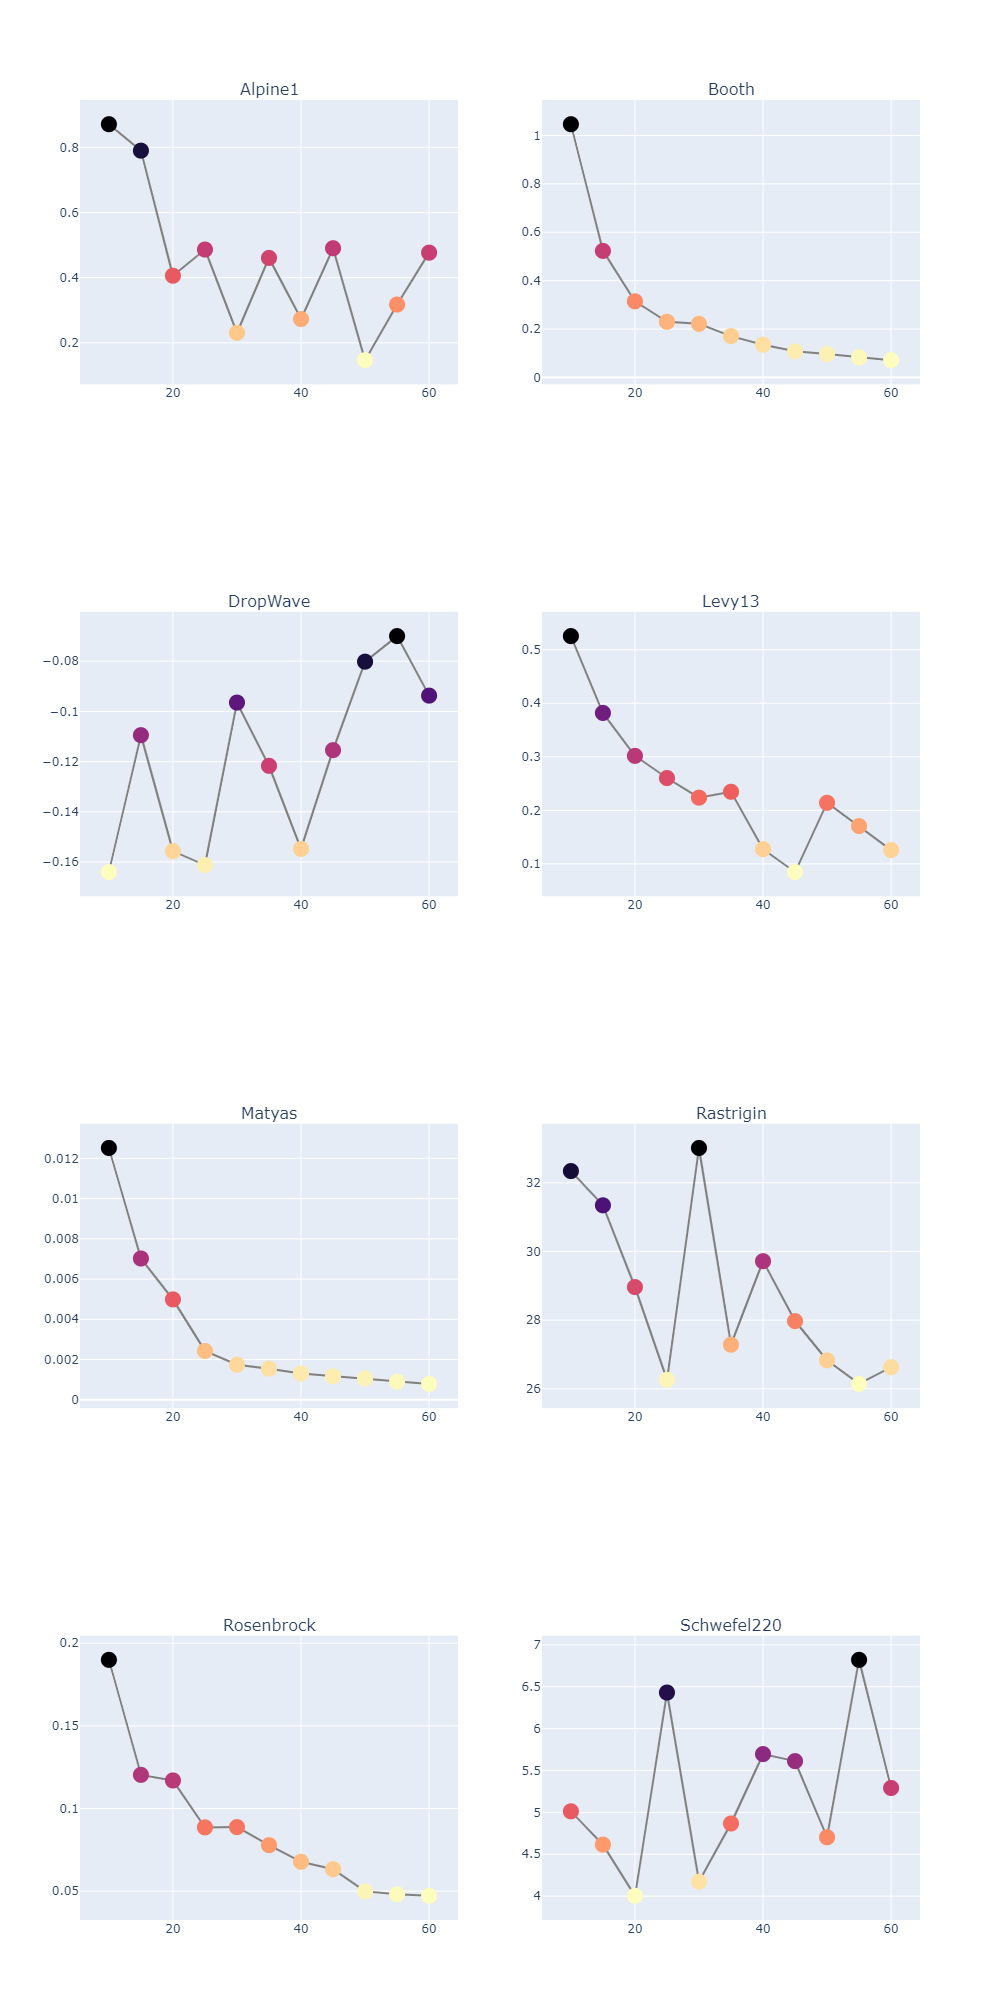

In [2]:
Image(filename="images/clonalgGen.png")

Again, we will check the results for each function.

##### 1. Alpine N.1     
The best result we received if number of iterations is equal to 50.

#####  2. Booth
The best is the model with number of iterations equal 60.

#####  3. Drop Wave function
The best is the model with number of iterations equal 10.

##### 4. Levy N.13
The number of iterations from now on will be 45.

#####  5. Matyas function
Like in Booth function, the best is the model with number of iterations equal 60.

#####  6. Rastrigin
The best is the model with number of iterations equal 25.

#####  7. Rosenbrock 
The best is the model with number of iterations equal 60.

#####  8. Schwefel 2.20 
The best value was achieved by the model with number equal 20.


As we get the result we can fill the dictionary

In [13]:
clonalgParam['Alpine1']['generations'] = 50
clonalgParam['Booth']['generations'] = 60
clonalgParam['DropWave']['generations'] = 10
clonalgParam['Levy13']['generations'] = 45
clonalgParam['Matyas']['generations'] = 60
clonalgParam['Rastrigin']['generations'] = 25
clonalgParam['Rosenbrock']['generations'] = 60
clonalgParam['Schwefel220']['generations'] = 20
clonalgParam

{'Alpine1': {'N': 10, 'generations': 50},
 'Booth': {'N': 20, 'generations': 60},
 'DropWave': {'N': 10, 'generations': 10},
 'Levy13': {'N': 90, 'generations': 45},
 'Matyas': {'N': 50, 'generations': 60},
 'Rastrigin': {'N': 90, 'generations': 25},
 'Rosenbrock': {'N': 80, 'generations': 60},
 'Schwefel220': {'N': 80, 'generations': 20}}

### Test 3 <a class="anchor" id="test_3"></a>

In test 3 we will see how decreasing the population every iteration affects the minimum returned.

specify as parameter kbest a number less than 1, which indicates what percentage of individuals will be left every iteration.

In [14]:
def test3(alg, f, low, up, c, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], generations=param[f.__name__]['generations'], b_low=low, b_up=up, c=c).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, c, f([x_mean,y_mean]), x_mean, y_mean, param[f.__name__]['N'], param[f.__name__]['generations'],(end-start)/nMean]

In [19]:
values = []
for c in range(6, 11, 1):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test3(Clonalg, f, b_low, b_up, c/10, 1, clonalgParam))
    
clonalgTest3 = pd.DataFrame(values, columns=['Algorithm','Function', 'c','Value', 'x', 'y', 'Population', 'Generations', 'time'])

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(clonalgTest3.loc[:, clonalgTest3.columns != 'Algorithm'].groupby(['Function','c']).min())

Value         x         y  Population  Generations  \
Function    c                                                            
Alpine1     0.6  0.209165 -0.510817 -0.164610          10           50   
            0.7  0.002926 -0.036846 -0.006392          10           50   
            0.8  2.115181  0.285701  2.179187          10           50   
            0.9  5.364485 -5.024919 -0.341984          10           50   
            1.0  0.003217 -0.082313 -0.022680          10           50   
Booth       0.6  0.083477  1.036497  2.843460          20           60   
            0.7  0.050144  0.869486  3.166835          20           60   
            0.8  0.459437  0.571462  3.182284          20           60   
            0.9  0.798369  0.833022  2.746754          20           60   
            1.0  0.003119  1.033044  2.958378          20           60   
DropWave    0.6 -0.456300 -0.309657 -0.575658          10           10   
            0.7 -0.748416 -0.240145  1.051064          10           10   
            0.8 -0.243617 -3.202861 -0.059543          10           10   
            0.9 -0.441646 -1.501914  1.516042          10           10   
            1.0 -0.347748  1.871730 -1.762481          10           10   
Levy13      0.6  0.003569  1.009302  0.991669          90           45   
            0.7  0.009359  1.015101  0.987713          90           45   
            0.8  0.136998  0.964744  0.788978          90           45   
            0.9  0.168929  1.065816  0.953558          90           45   
            1.0  0.507271  1.509749  1.372258          90           45   
Matyas      0.6  0.002443  0.152551  0.063653          50           60   
            0.7  0.001967  0.081832  0.156634          50           60   
            0.8  0.026654 -0.131576  0.194701          50           60   
            0.9  2.653987  7.490053  5.532340          50           60   
            1.0  0.001810 -0.043588  0.041494          50           60   
Rastrigin   0.6  9.519006  0.113181 -1.179117          90           25   
            0.7  5.443601 -0.155810 -0.991043          90           25   
            0.8  4.281974  1.089583 -1.048117          90           25   
            0.9  9.951784  0.176776  2.033783          90           25   
            1.0  9.910495 -2.056297  1.914885          90           25   
Rosenbrock  0.6  0.017246  0.871896  0.757312          80           60   
            0.7  0.092951  1.116760  1.218989          80           60   
            0.8  0.042011  1.160898  1.334986          80           60   
            0.9  0.038656  0.897088  0.821519          80           60   
            1.0  0.016241  1.065363  1.145939          80           60   
Schwefel220 0.6  1.561124 -0.227096 -1.334028          80           20   
            0.7  0.781398 -0.437896 -0.343502          80           20   
            0.8  1.955316 -1.283625  0.671691          80           20   
            0.9  2.048313 -1.311912  0.736400          80           20   
            1.0  0.246780  0.096087 -0.150693          80           20   

                      time  
Function    c               
Alpine1     0.6   0.080757  
            0.7   0.099735  
            0.8   0.007979  
            0.9   0.009974  
            1.0   0.136635  
Booth       0.6   0.313169  
            0.7   0.366005  
            0.8   0.045876  
            0.9   0.048869  
            1.0   0.468747  
DropWave    0.6   0.014966  
            0.7   0.019945  
            0.8   0.008974  
            0.9   0.008977  
            1.0   0.026928  
Levy13      0.6   6.460737  
            0.7   6.316834  
            0.8   4.993800  
            0.9   5.511254  
            1.0  10.795154  
Matyas      0.6   1.616003  
            0.7   1.892939  
            0.8   0.675163  
            0.9   0.720666  
            1.0   2.671922  
Rastrigin   0.6   2.749753  
            0.7   2.710765  
            0.8   2.972083  
            0.9   3.088737  
            

##### 1. Alpine N.1     
The best result we received if c parameter is equal to 0.7.

#####  2. Booth
The best result we got if the population size not change.

#####  3. Drop Wave function
The same result as in Alpine.

##### 4. Levy N.13
We got the best result if in every iteration stays 60% of population.

#####  5. Matyas function
The best result we received if c parameter is equal to 1.

#####  6. Rastrigin
We didn't get satisfying result, but the model with 80% population left looks the best.

#####  7. Rosenbrock 
The best result we received if c parameter is equal to 1.

#####  8. Schwefel 2.20 
The same result as above.


As we get the result we can fill the dictionary

In [21]:
with pd.ExcelWriter('clonalg.xlsx') as writer:  
    clonalgTest1.to_excel(writer, sheet_name='test1')
    clonalgTest2.to_excel(writer, sheet_name='test2')
    clonalgTest3.to_excel(writer, sheet_name='test3')

In [22]:
clonalgParam['Alpine1']['c'] = 0.7
clonalgParam['Booth']['c'] = 1
clonalgParam['DropWave']['c'] = 0.7
clonalgParam['Levy13']['c'] = 0.6
clonalgParam['Matyas']['c'] = 1
clonalgParam['Rastrigin']['c'] = 0.8
clonalgParam['Rosenbrock']['c'] = 1
clonalgParam['Schwefel220']['c'] = 1
clonalgParam

{'Alpine1': {'N': 10, 'generations': 50, 'c': 0.7},
 'Booth': {'N': 20, 'generations': 60, 'c': 1},
 'DropWave': {'N': 10, 'generations': 10, 'c': 0.7},
 'Levy13': {'N': 90, 'generations': 45, 'c': 0.6},
 'Matyas': {'N': 50, 'generations': 60, 'c': 1},
 'Rastrigin': {'N': 90, 'generations': 25, 'c': 0.8},
 'Rosenbrock': {'N': 80, 'generations': 60, 'c': 1},
 'Schwefel220': {'N': 80, 'generations': 20, 'c': 1}}

### Test 4 <a class="anchor" id="test_4"></a>

In the test 4, we will check how numbers (beta) of clones affect the minima found.

In [23]:
def test4(alg, f, low, up, beta, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], generations=param[f.__name__]['generations'], c=param[f.__name__]['c'], b_low=low, b_up=up, beta=beta).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, beta, f([x_mean,y_mean]), x_mean, y_mean, param[f.__name__]['N'], param[f.__name__]['generations'],param[f.__name__]['c'],(end-start)/nMean]

In [27]:
values = []
for beta in range(5, 26, 5):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test4(Clonalg, f, b_low, b_up, beta/10, 30, clonalgParam))
    
clonalgTest4 = pd.DataFrame(values, columns=['Algorithm','Function', 'beta','Value', 'x', 'y', 'Population', 'Generations', 'c', 'time'])

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(clonalgTest4.loc[:, clonalgTest4.columns != 'Algorithm'].groupby(['Function','beta']).min())

Value         x         y  Population  Generations    c  \
Function    beta                                                                
Alpine1     0.5    0.002961 -0.085170 -0.021532          10           50  0.7   
            1.0    0.012018 -0.083879 -0.165244          10           50  0.7   
            1.5    0.025937 -0.215001 -0.080658          10           50  0.7   
            2.0    0.003545 -0.083619 -0.118553          10           50  0.7   
            2.5    0.009545 -0.062062 -0.148839          10           50  0.7   
Booth       0.5    0.008652  0.961496  2.996209          20           60  1.0   
            1.0    0.005905  1.048339  2.942896          20           60  1.0   
            1.5    0.000936  1.002511  2.984394          20           60  1.0   
            2.0    0.000708  0.985001  3.004212          20           60  1.0   
            2.5    0.006190  1.058222  2.957618          20           60  1.0   
DropWave    0.5   -0.576156  0.822356  0.479229          10           10  0.7   
            1.0   -0.034866  0.216146  0.079451          10           10  0.7   
            1.5   -0.910738 -0.228571 -0.497835          10           10  0.7   
            2.0   -0.127100  0.138071  0.145694          10           10  0.7   
            2.5   -0.367157 -0.017109 -0.151978          10           10  0.7   
Levy13      0.5    0.001007  1.004798  1.008671          90           45  0.6   
            1.0    0.002932  0.992014  1.018585          90           45  0.6   
            1.5    0.026934  0.974369  1.022907          90           45  0.6   
            2.0    0.012957  1.017914  1.004562          90           45  0.6   
            2.5    0.005439  0.991790  1.049667          90           45  0.6   
Matyas      0.5    0.000032  0.025766  0.018665          50           60  1.0   
            1.0    0.000061  0.039793  0.035376          50           60  1.0   
            1.5    0.000036  0.030290  0.025981          50           60  1.0   
            2.0    0.000041  0.027885  0.032266          50           60  1.0   
            2.5    0.000005  0.002752 -0.001626          50           60  1.0   
Rastrigin   0.5    0.851071  0.042635 -0.050034          90           25  0.8   
            1.0   15.711960 -0.344457 -0.001882          90           25  0.8   
            1.5   17.065385 -0.301257  0.143341          90           25  0.8   
            2.0    0.322127 -0.005843 -0.039974          90           25  0.8   
            2.5   19.492311 -0.378788 -0.105052          90           25  0.8   
Rosenbrock  0.5    0.080339  1.007048  1.042481          80           60  1.0   
            1.0    0.036405  1.067180  1.156731          80           60  1.0   
            1.5    0.053447  1.016244  1.055813          80           60  1.0   
            2.0    0.037344  0.996537  1.012408          80           60  1.0   
            2.5    0.031209  0.991274  1.000269          80           60  1.0   
Schwefel220 0.5    0.132389  0.049707 -0.082682          80           20  1.0   
            1.0    0.214762  0.071412  0.143349          80           20  1.0   
            1.5    0.236382 -0.189777  0.046605          80           20  1.0   
            2.0    0.189459  0.174794 -0.014665          80           20  1.0   
            2.5    0.448811  0.241689  0.207122          80           20  1.0   

                       time  
Function    beta             
Alpine1     0.5    0.036970  
            1.0    0.071337  
            1.5    0.098416  
            2.0    0.092685  
            2.5    0.111952  
Booth       0.5    0.161751  
            1.0    0.294723  
            1.5    0.411798  
            2.0    0.551824  
            2.5    0.594651  
DropWave    0.5    0.007290  
            1.0    0.014580  
            1.5    0.020305  
            2.0    0.018225  
            2.5    0.022390  
Levy13      0.5    1.882351  
            1.0    4.322692  
            1.5    5.525327  
            2.0   1

In this test, also very important is the time it takes to return the value.

##### 1. Alpine N.1     
The best result we received if beta is equal to 0.5.

#####  2. Booth
We got the best result for beta equals to 2 and it didn't take very long time.

#####  3. Drop Wave function
The best result we received if beta is equal to 1.5.

##### 4. Levy N.13
Fortunately, the best result we got from model with beta equals to 0.5.

#####  5. Matyas function
We got the best result from model with beta equals to 2, but it took almost 3.3 s to return value. Satisfying value we got also from model with beta=0.5, so we decide that is the perfect parameter value.

#####  6. Rastrigin
We can see, that the value of beta is important. We got close to perfect result from model with beta equals to 2.

#####  7. Rosenbrock 
Like in Matyas case, we got the best result from model with beta=2, but it took too long, so from now on the beta value for Rosenbrock function will be 1.

#####  8. Schwefel 2.20 
The best result we received if beta is equal to 0.5.


As we get the result we can fill the dictionary

In [30]:
clonalgParam['Alpine1']['beta'] = 0.7
clonalgParam['Booth']['beta'] = 2
clonalgParam['DropWave']['beta'] = 1.5
clonalgParam['Levy13']['beta'] = 0.5
clonalgParam['Matyas']['beta'] = 0.5
clonalgParam['Rastrigin']['beta'] = 2
clonalgParam['Rosenbrock']['beta'] = 1
clonalgParam['Schwefel220']['beta'] = 0.5
clonalgParam

{'Alpine1': {'N': 10, 'generations': 50, 'c': 0.7, 'beta': 0.7},
 'Booth': {'N': 20, 'generations': 60, 'c': 1, 'beta': 2},
 'DropWave': {'N': 10, 'generations': 10, 'c': 0.7, 'beta': 1.5},
 'Levy13': {'N': 90, 'generations': 45, 'c': 0.6, 'beta': 0.5},
 'Matyas': {'N': 50, 'generations': 60, 'c': 1, 'beta': 0.5},
 'Rastrigin': {'N': 90, 'generations': 25, 'c': 0.8, 'beta': 2},
 'Rosenbrock': {'N': 80, 'generations': 60, 'c': 1, 'beta': 1},
 'Schwefel220': {'N': 80, 'generations': 20, 'c': 1, 'beta': 0.5}}

In [29]:
with pd.ExcelWriter('clonalg.xlsx') as writer:  
    clonalgTest1.to_excel(writer, sheet_name='test1')
    clonalgTest2.to_excel(writer, sheet_name='test2')
    clonalgTest3.to_excel(writer, sheet_name='test3')
    clonalgTest4.to_excel(writer, sheet_name='test4')

### Test 5 <a class="anchor" id="test_5"></a>

We will check the maximum reach of mutation from 1 to 5.

In [31]:
def test5(alg, f, low, up, p_max, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], generations=param[f.__name__]['generations'], c=param[f.__name__]['c'], beta=param[f.__name__]['beta'], b_low=low, b_up=up, p_max=p_max).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, p_max, f([x_mean,y_mean]), x_mean, y_mean, param[f.__name__]['N'], param[f.__name__]['generations'],param[f.__name__]['c'],param[f.__name__]['beta'],(end-start)/nMean]

In [33]:
values = []
for p_max in range(1, 6, 1):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test5(Clonalg, f, b_low, b_up, p_max, 30, clonalgParam))
    
clonalgTest5 = pd.DataFrame(values, columns=['Algorithm','Function', 'p_max','Value', 'x', 'y', 'Population', 'Generations','c','beta', 'time'])

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(clonalgTest5.loc[:, clonalgTest5.columns != 'Algorithm'].groupby(['Function','p_max']).min())

Value         x         y  Population  Generations  \
Function    p_max                                                           
Alpine1     1       0.014538 -0.068831 -0.172624          10           50   
            2       0.012605  0.065165 -0.116147          10           50   
            3       0.009721 -0.149532 -0.060214          10           50   
            4       0.010283  0.023123 -0.150104          10           50   
            5       0.017672 -0.133102 -0.176409          10           50   
Booth       1       0.004658  1.039320  2.949178          20           60   
            2       0.001966  1.021964  2.967615          20           60   
            3       0.000574  1.004298  2.986161          20           60   
            4       0.000940  1.003991  2.983304          20           60   
            5       0.004681  0.949170  3.043136          20           60   
DropWave    1      -0.530260  0.372067 -0.150402          10           10   
            2      -0.887685  0.439494  0.198147          10           10   
            3      -0.256084 -0.863114 -0.186791          10           10   
            4      -0.009497  0.114020 -0.217313          10           10   
            5      -0.522168 -0.533558 -0.356670          10           10   
Levy13      1       0.000702  1.000696  1.025793          90           45   
            2       0.000702  1.002466  1.021152          90           45   
            3       0.001773  0.999915  0.959187          90           45   
            4       0.004890  1.009482  1.034504          90           45   
            5       0.034306  1.028659  0.964534          90           45   
Matyas      1       0.000105 -0.033740 -0.046547          50           60   
            2       0.000050  0.024571  0.032842          50           60   
            3       0.000010  0.016381  0.015546          50           60   
            4       0.000013  0.017584  0.018068          50           60   
            5       0.000012 -0.010663 -0.015083          50           60   
Rastrigin   1      20.255662  0.472866  0.029917          90           25   
            2       9.319498  0.169230  0.150119          90           25   
            3      18.605961  0.031066  0.404455          90           25   
            4       3.653511 -0.119979  0.068993          90           25   
            5       7.876041  0.212669  0.027982          90           25   
Rosenbrock  1       0.079040  1.087363  1.209081          80           60   
            2       0.026698  1.016196  1.048913          80           60   
            3       0.146730  1.016894  1.072341          80           60   
            4       0.012003  1.023517  1.058288          80           60   
            5       0.020641  0.998999  1.012365          80           60   
Schwefel220 1       0.094877 -0.021226 -0.073651          80           20   
            2       0.092388 -0.023457 -0.068931          80           20   
            3       0.076659  0.009980 -0.066680          80           20   
            4       0.142818  0.130574 -0.012243          80           20   
            5       0.104836 -0.002000  0.102836          80           20   

                     c  beta      time  
Function    p_max                       
Alpine1     1      0.7   0.7  0.042576  
            2      0.7   0.7  0.042180  
            3      0.7   0.7  0.041190  
            4      0.7   0.7  0.039561  
            5      0.7   0.7  0.040558  
Booth       1      1.0   2.0  0.508645  
            2      1.0   2.0  0.517856  
            3      1.0   2.0  0.480124  
            4      1.0   2.0  0.505478  
            5      1.0   2.0  0.478652  
DropWave    1      0.7   1.5  0.014640  
            2      0.7   1.5  0.016243  
            3      0.7   1.5  0.015325  
            4      0.7   1.5  0.014461  
            5      0.7   1.5  0.014594  
Levy13      1      0.6   0.5  1.719386  
            2      0.6   0.5  1.690801  
         

##### 1. Alpine N.1     
The best result we received if the maximum reach of mutation is equal to 3.

#####  2. Booth
The same as above.

#####  3. Drop Wave function
The best result we received if p_max is equal to 2.

##### 4. Levy N.13
We got the same result from models with p_max equals to 1 and 2. Let's decide that that perfect p_max equals to 1.

#####  5. Matyas function
The best result we received if the maximum reach of mutation is equal to 3.

#####  6. Rastrigin
The best result we received if p_max is equal to 4.

#####  7. Rosenbrock 
The same as above.

#####  8. Schwefel 2.20 
The best result we received if the maximum reach of mutation is equal to 3.


As we get the result we can fill the dictionary

In [37]:
clonalgParam['Alpine1']['p_max'] = 3
clonalgParam['Booth']['p_max'] = 3
clonalgParam['DropWave']['p_max'] = 2
clonalgParam['Levy13']['p_max'] = 1
clonalgParam['Matyas']['p_max'] = 3
clonalgParam['Rastrigin']['p_max'] = 4
clonalgParam['Rosenbrock']['p_max'] = 4
clonalgParam['Schwefel220']['p_max'] = 3
clonalgParam

{'Alpine1': {'N': 10, 'generations': 50, 'c': 0.7, 'beta': 0.7, 'p_max': 3},
 'Booth': {'N': 20, 'generations': 60, 'c': 1, 'beta': 2, 'p_max': 3},
 'DropWave': {'N': 10, 'generations': 10, 'c': 0.7, 'beta': 1.5, 'p_max': 2},
 'Levy13': {'N': 90, 'generations': 45, 'c': 0.6, 'beta': 0.5, 'p_max': 1},
 'Matyas': {'N': 50, 'generations': 60, 'c': 1, 'beta': 0.5, 'p_max': 3},
 'Rastrigin': {'N': 90, 'generations': 25, 'c': 0.8, 'beta': 2, 'p_max': 4},
 'Rosenbrock': {'N': 80, 'generations': 60, 'c': 1, 'beta': 1, 'p_max': 4},
 'Schwefel220': {'N': 80, 'generations': 20, 'c': 1, 'beta': 0.5, 'p_max': 3}}

In [38]:
with pd.ExcelWriter('clonalg.xlsx') as writer:  
    clonalgTest1.to_excel(writer, sheet_name='test1')
    clonalgTest2.to_excel(writer, sheet_name='test2')
    clonalgTest3.to_excel(writer, sheet_name='test3')
    clonalgTest4.to_excel(writer, sheet_name='test4')
    clonalgTest5.to_excel(writer, sheet_name='test5')

### Test 6 <a class="anchor" id="test_6"></a>

We will check the fi (scaling parameter) from 0.1 to 1.1.

In [41]:
def test6(alg, f, low, up, fi, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], generations=param[f.__name__]['generations'], c=param[f.__name__]['c'], beta=param[f.__name__]['beta'], p_max=param[f.__name__]['p_max'], b_low=low, b_up=up, fi=fi).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, fi, f([x_mean,y_mean]), x_mean, y_mean, 
            param[f.__name__]['N'], param[f.__name__]['generations'],
            param[f.__name__]['c'],param[f.__name__]['beta'], 
            param[f.__name__]['p_max'],
            (end-start)/nMean]

In [43]:
values = []
for fi in range(1, 12, 1):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test6(Clonalg, f, b_low, b_up, fi/10, 30, clonalgParam))
    
clonalgTest6 = pd.DataFrame(values, columns=['Algorithm','Function', 'fi','Value', 'x', 'y', 'Population', 'Generations','c','beta', 'p_max','time'])

In [47]:
with pd.ExcelWriter('clonalg.xlsx') as writer:  
    clonalgTest1.to_excel(writer, sheet_name='test1')
    clonalgTest2.to_excel(writer, sheet_name='test2')
    clonalgTest3.to_excel(writer, sheet_name='test3')
    clonalgTest4.to_excel(writer, sheet_name='test4')
    clonalgTest5.to_excel(writer, sheet_name='test5')
    clonalgTest6.to_excel(writer, sheet_name='test6')

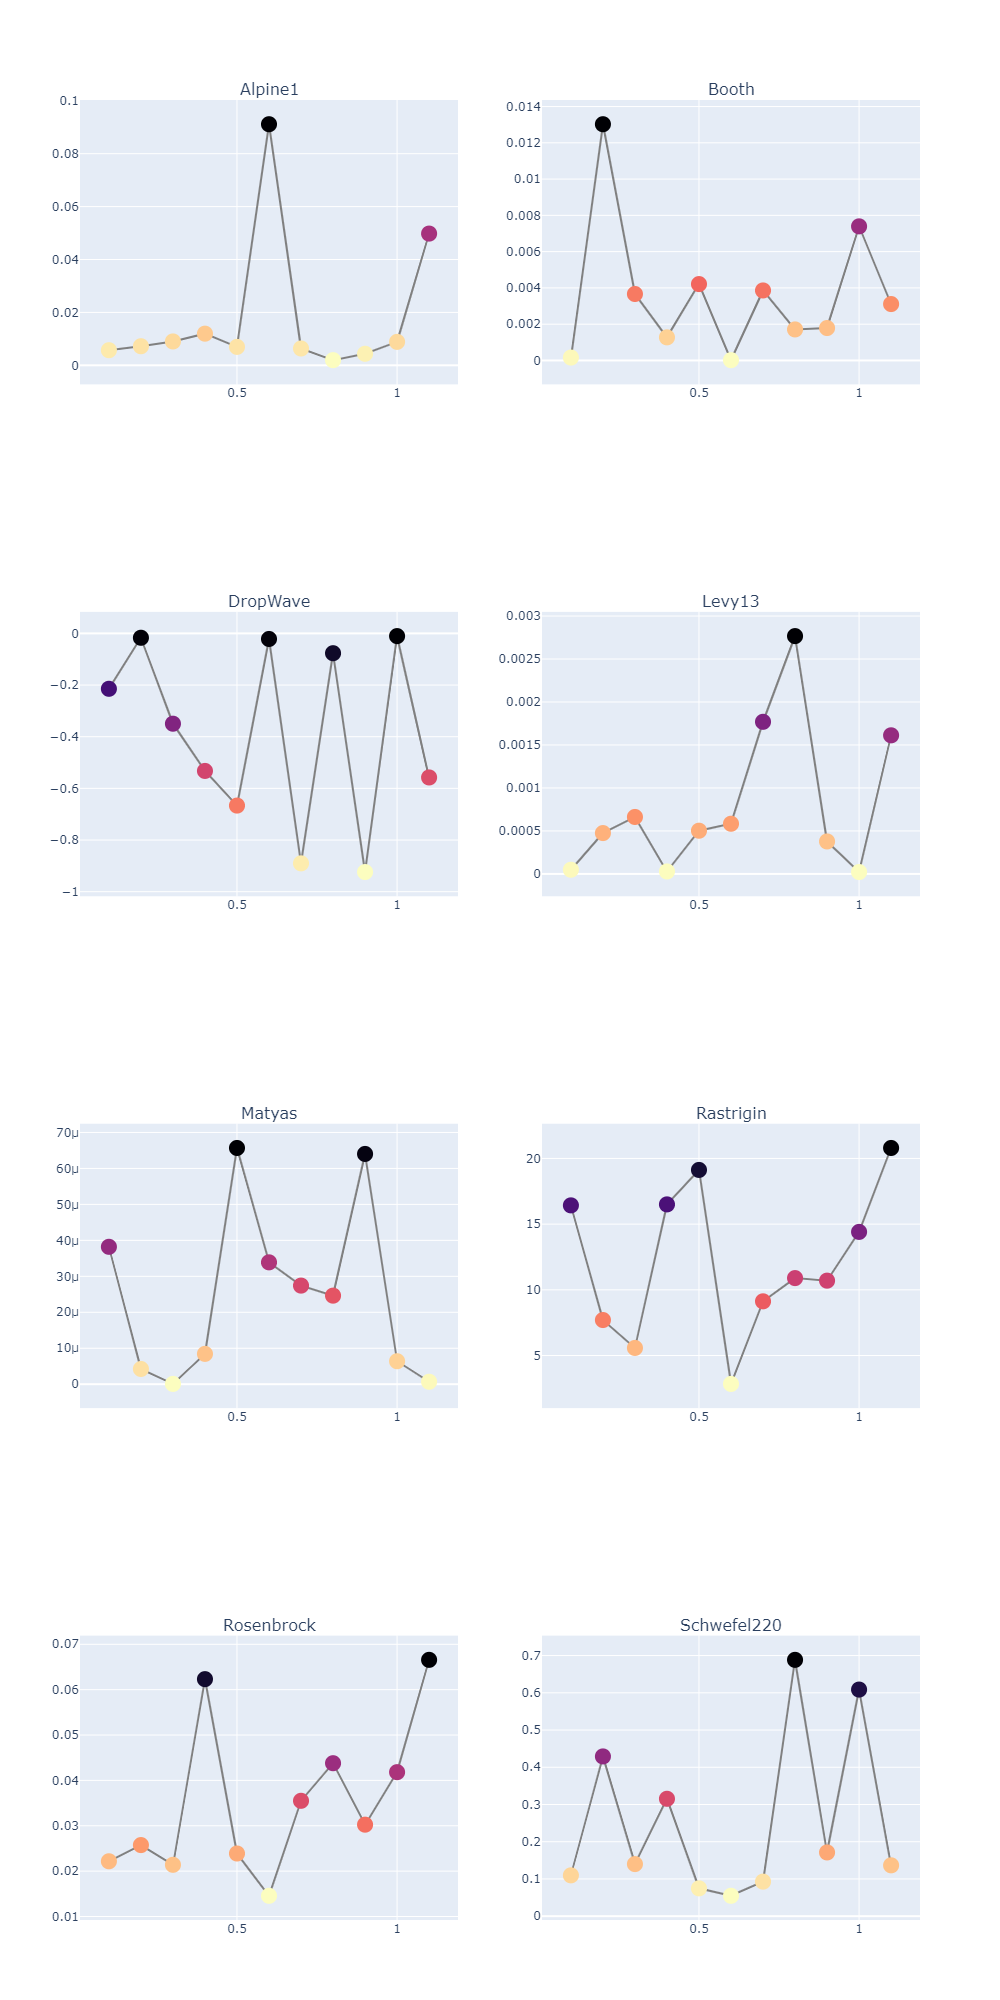

In [3]:
Image(filename="images/clonalgFi.png")

For each fi, the time is comparable.

##### 1. Alpine N.1     
The best result we received if fi is equal to 0.8.

#####  2. Booth
The best fi is 0.6.

#####  3. Drop Wave function
The best result we received if fi is equal to 0.9.

##### 4. Levy N.13
Let's decide that that perfect fi equals to 1.

#####  5. Matyas function
The best result we received if the fin is equal to 0.3.

#####  6. Rastrigin
The best result we received if fi is equal to 0.6.

#####  7. Rosenbrock 
The same as above.

#####  8. Schwefel 2.20 
The same as above.


As we get the result we can fill the dictionary

In [53]:
clonalgParam['Alpine1']['fi'] = 0.8
clonalgParam['Booth']['fi'] = 0.6
clonalgParam['DropWave']['fi'] = 0.9
clonalgParam['Levy13']['fi'] = 1
clonalgParam['Matyas']['fi'] = 0.3
clonalgParam['Rastrigin']['fi'] = 0.6
clonalgParam['Rosenbrock']['fi'] = 0.6
clonalgParam['Schwefel220']['fi'] = 0.6

### Test 7 <a class="anchor" id="test_7"></a>

We will check the adjustment scale from 0.7 to 1.

In [56]:
def test7(alg, f, low, up, k, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], generations=param[f.__name__]['generations'], c=param[f.__name__]['c'], beta=param[f.__name__]['beta'], p_max=param[f.__name__]['p_max'], fi=param[f.__name__]['fi'], b_low=low, b_up=up, k=k).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, k, f([x_mean,y_mean]), x_mean, y_mean, 
            param[f.__name__]['N'], param[f.__name__]['generations'],
            param[f.__name__]['c'],param[f.__name__]['beta'], 
            param[f.__name__]['p_max'], param[f.__name__]['fi'],
            (end-start)/nMean]

In [58]:
values = []
for k in range(70, 105, 5):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test7(Clonalg, f, b_low, b_up, k/100, 30, clonalgParam))
    
clonalgTest7 = pd.DataFrame(values, columns=['Algorithm','Function', 'k','Value', 'x', 'y', 'Population', 'Generations','c','beta', 'p_max','fi','time'])

In [62]:
rows=4
cols=2
functions = [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Alpine1, Schwefel220, DropWave]
fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=("Alpine1", "Booth", "DropWave", "Levy13", "Matyas", "Rastrigin", "Rosenbrock",
                                    "Schwefel220"))

i=0
j=0
for f in ["Alpine1", "Booth", "DropWave", "Levy13", "Matyas", "Rastrigin", "Rosenbrock",  "Schwefel220"]:
    x = clonalgTest7[clonalgTest7['Function']==f]['k'].astype(float)
    y = clonalgTest7[clonalgTest7['Function']==f]['Value'].astype(float)
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='lines+markers', name=f, line=dict(color='gray'), marker=dict(size=16, color=y,
                                                                            colorscale='Magma_r', showscale=False),
                  showlegend=False),
        row=int( (i%rows) + 1), col= (j % cols) + 1
    )
    i+=0.5
    j+=1


fig.update_layout(height=2000, width=1000)
fig.show()

##### 1. Alpine N.1     
The best result we received if k is equal to 0.95.

#####  2. Booth
The best k is 0.8.

#####  3. Drop Wave function
The best result we received if k is equal to 0.9.

##### 4. Levy N.13
Let's decide that that perfect fi equals to 1.

#####  5. Matyas function
The best result we received if the k is equal to 0.85.

#####  6. Rastrigin
The best result we received if k is equal to 0.8.

#####  7. Rosenbrock 
The same as above.

#####  8. Schwefel 2.20 
The best result we received if k is equal to 1.


As we get the result we can fill the dictionary

In [63]:
clonalgParam['Alpine1']['k'] = 0.95
clonalgParam['Booth']['k'] = 0.8
clonalgParam['DropWave']['k'] = 0.9
clonalgParam['Levy13']['k'] = 1
clonalgParam['Matyas']['k'] = 0.85
clonalgParam['Rastrigin']['k'] = 0.8
clonalgParam['Rosenbrock']['k'] = 0.8
clonalgParam['Schwefel220']['k'] = 1

## Summary <a class="anchor" id="sum"></a>

Now we can check if our models works better than the initial one.

In [67]:
regular = {}
revised = {}
for f in [Alpine1, Booth, DropWave, Levy13, Matyas, Rastrigin, Rosenbrock,  Schwefel220]:
    regular[f.__name__] = Clonalg().optimize(f)
    revised[f.__name__] = Clonalg(N=clonalgParam[f.__name__]['N'], generations=clonalgParam[f.__name__]['generations'], 
                                  c=clonalgParam[f.__name__]['c'], beta=clonalgParam[f.__name__]['beta'], 
                                  p_max=clonalgParam[f.__name__]['p_max'], fi=clonalgParam[f.__name__]['fi'], 
                                  k=clonalgParam[f.__name__]['k']).optimize(f)
    print(f.__name__)
    print(regular[f.__name__], "--->", f(regular[f.__name__]))
    print(revised[f.__name__], "--->", f(revised[f.__name__]))
    print("___________________________________________________________________________________________")

Alpine1
[-1.35949958 -6.45380001] ---> 1.6437128376377785
[2.84580543 0.10241629] ---> 1.134825243930261
___________________________________________________________________________________________
Booth
[1.35114593 2.80153855] ---> 0.25594061503323756
[0.99143153 3.04242908] ---> 0.006459807519680026
___________________________________________________________________________________________
DropWave
[-0.92316474  2.42708526] ---> -0.3663050839568017
[-2.45260762  1.93307169] ---> -0.2871939698858962
___________________________________________________________________________________________
Levy13
[1.50968172 1.10815534] ---> 0.46825588257065376
[0.96734125 1.00510499] ---> 0.04261488859685639
___________________________________________________________________________________________
Matyas
[-0.01940622 -0.06290729] ---> 0.0005408409399842219
[-0.00176763  0.01759453] ---> 9.622820920029661e-05
___________________________________________________________________________________________
R

Except for Drop Wave functions, revised models return better minimums.

These models will be used in final Comparison notebook, where three algorithms will be compared.